<h1>1. Dataset Check</h1>
https://www.youtube.com/watch?v=_iqz7tFhox0

https://kaggle-kr.tistory.com/17
타이타닉 튜토리얼

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#seaborn: 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

plt.style.use('seaborn')
#plt.style.use()를 사용하여 다양한 스타일을 지정할 수 있음
sns.set(font_scale=2.5)
#set: 집합에 관련된 것을 쉽게 처리하기 위해 만든 자료형

import missingno as msno
#missingno: 결측 데이터들을 파악하는데 직관적인 도움을 주는 패키지

#ignore warnings
import warnings
#warnings 라이브러리로 경고 메시지 무시하기
warnings.filterwarnings('ignore')

%matplotlib inline

In [91]:
df_train=pd.read_csv('/kaggle/input/titititanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titititanic/test.csv')

In [92]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [93]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
df_train.shape

(891, 12)

In [95]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [96]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
type(df_train[col])

pandas.core.series.Series

In [98]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    
#format: 문자열을 출력할 때 서식 지정자를 사용하여 출력하고자 하는 경우에 사용함

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [99]:
df_train[col].isnull().sum()/df_train[col].shape[0]
#isnull().sum(): 결측값을 확인해보려면 isnull().sum()을 사용하는 것이 간편하다

0.002244668911335578

In [100]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


<Axes: >

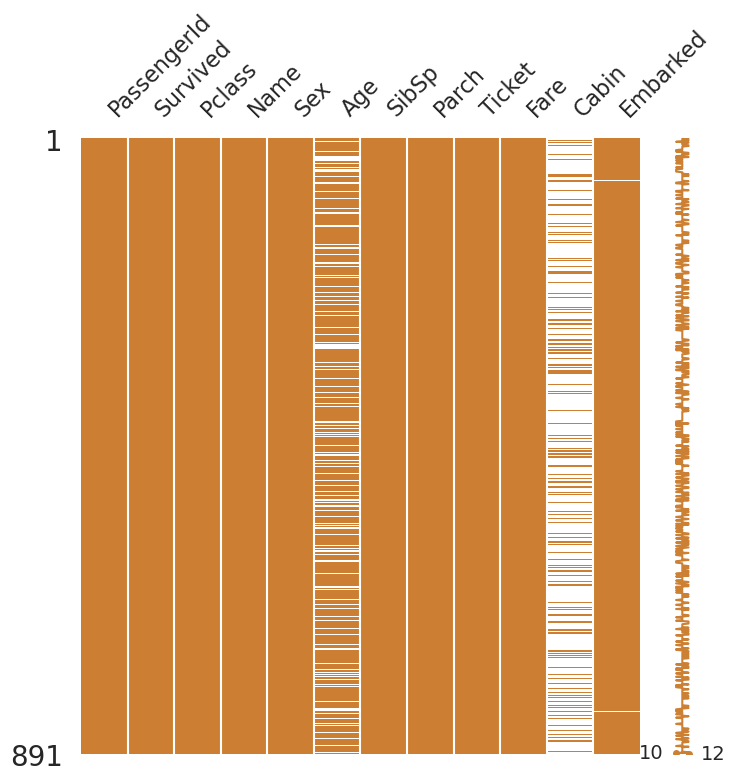

In [101]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

In [102]:
df_train.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: >

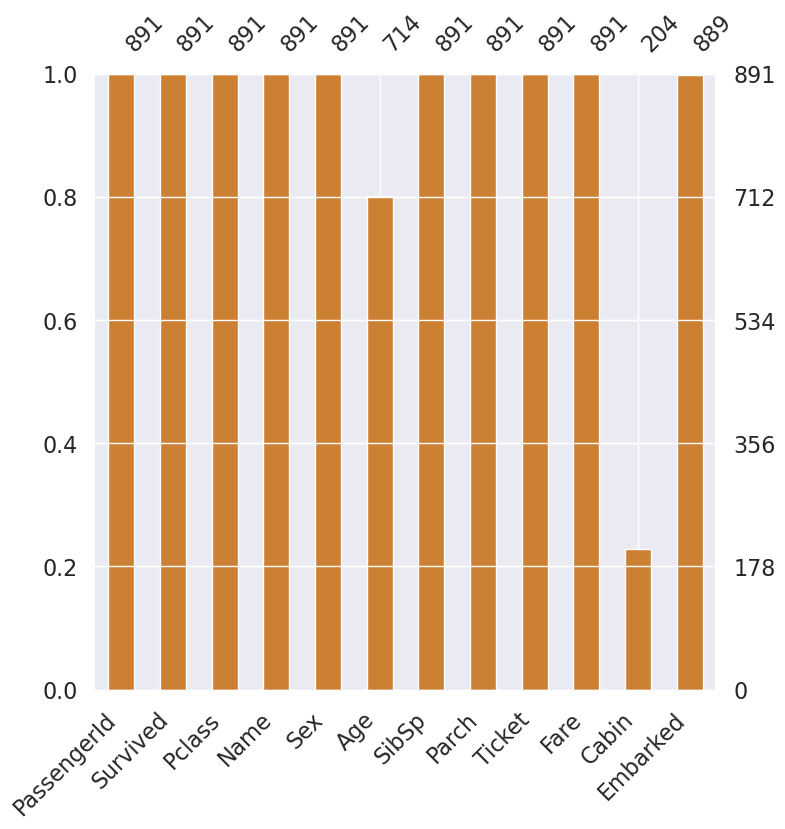

In [103]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

<Axes: >

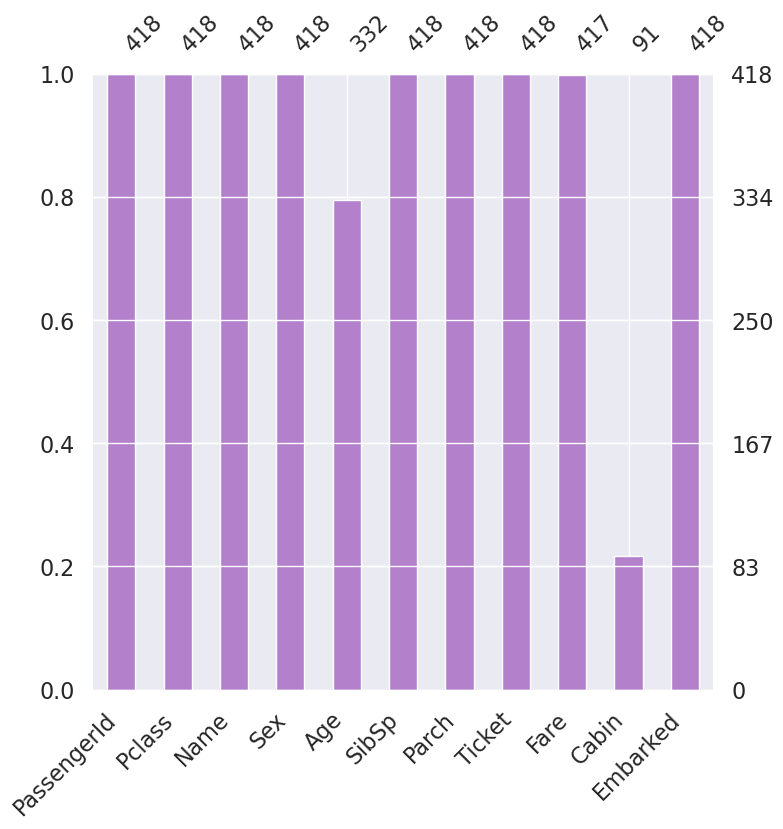

In [104]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8), color=(0.7,0.5,0.8))

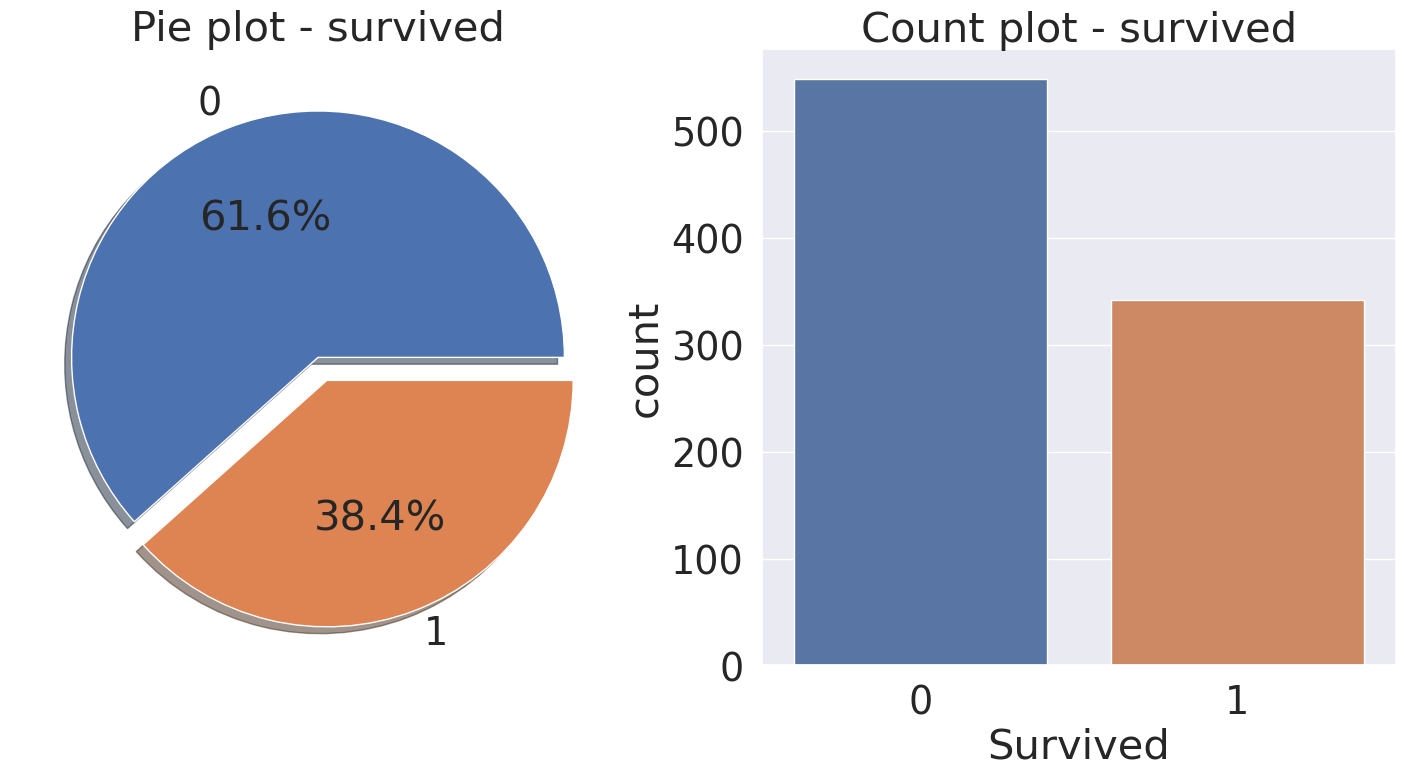

In [105]:
f, ax=plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

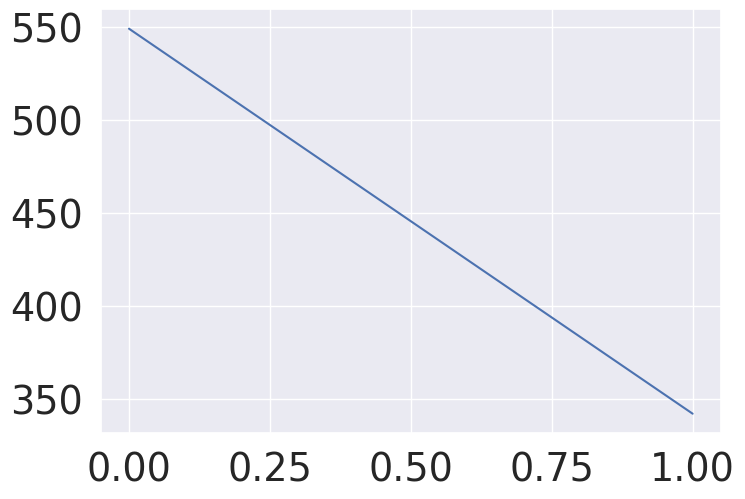

In [106]:
plt.plot(df_train['Survived'].value_counts())

<Axes: >

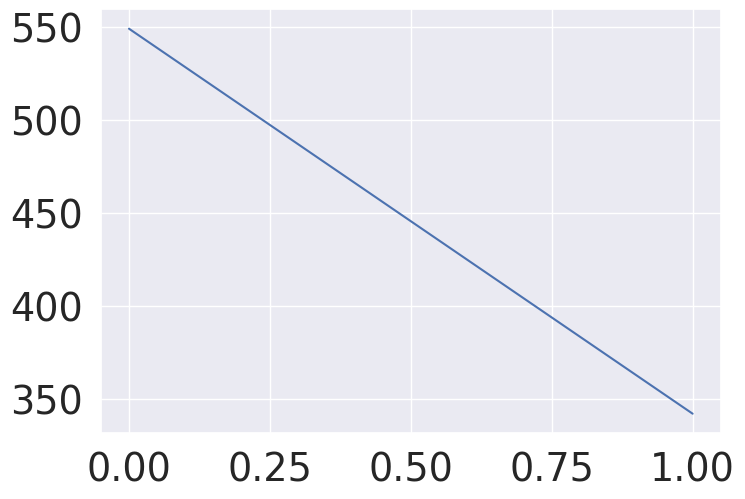

In [107]:
df_train['Survived'].value_counts().plot()
#위에 그래프랑 똑같음

<Axes: ylabel='Survived'>

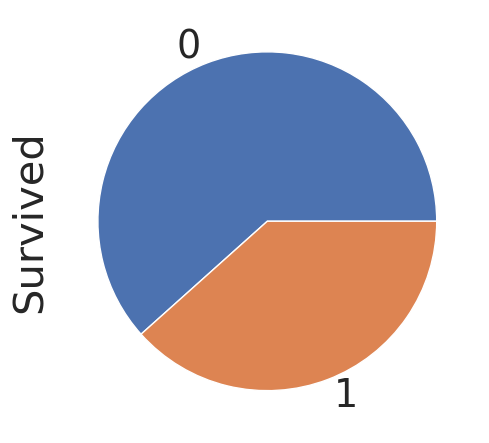

In [108]:
df_train['Survived'].value_counts().plot.pie()

<h1>2. EDA</h1>

In [109]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
df_train.shape

(891, 12)

<h4>2-1</h4>
https://www.youtube.com/watch?v=sDH2zr48gTE

In [111]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [112]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [113]:
df_train['Survived'].unique()

array([0, 1])

In [114]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='RdPu')
#margin: All을 나타냄
#style.background_gradient: 배경 색깔
#color map scheme: cmap의 색깔 코드

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [115]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
#as_index=True: Pclass를 인덱스로 사용함

,Survived
Pclass,
1,216
2,184
3,491


<Axes: xlabel='Pclass'>

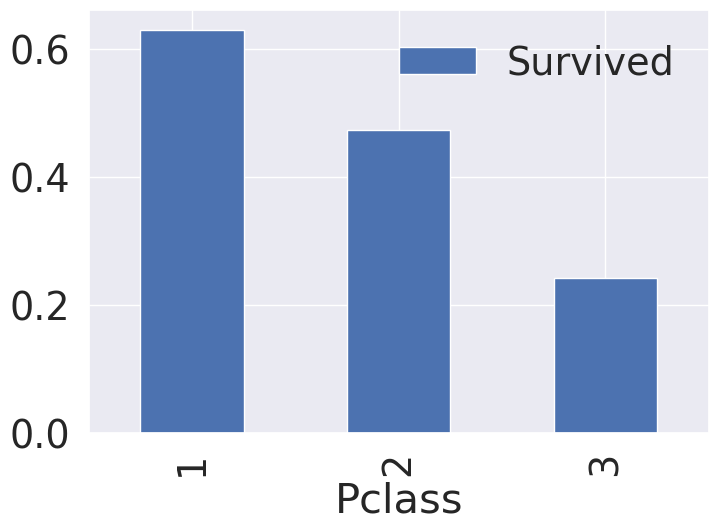

In [116]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
#ascending=False: 오름차순

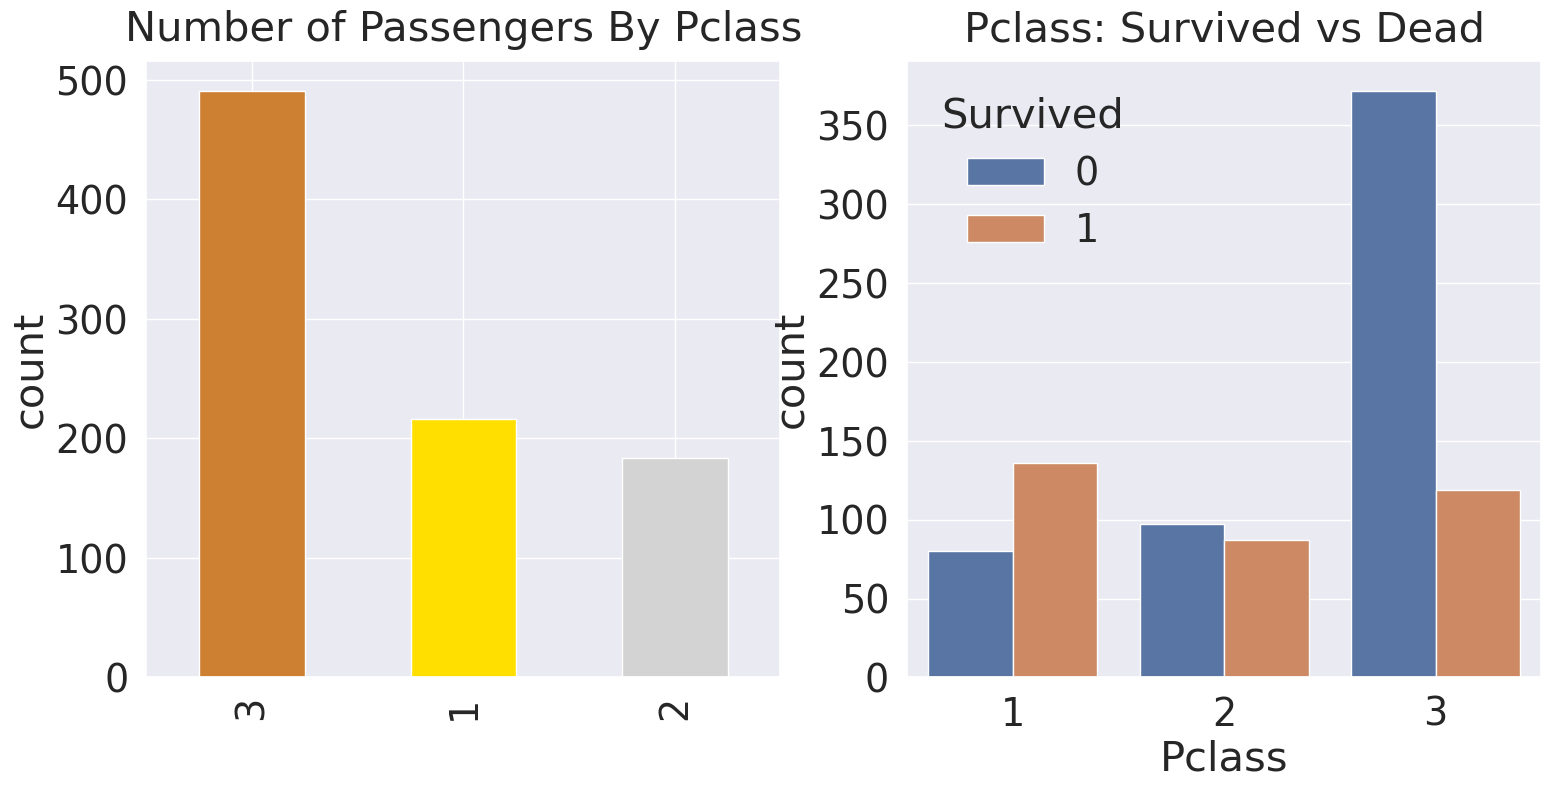

In [117]:
y_position=1.02
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('count')
sns.countplot(x='Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)
plt.show()

<h4>2-2</h4>
https://www.youtube.com/watch?v=-v42Y-r9VqE

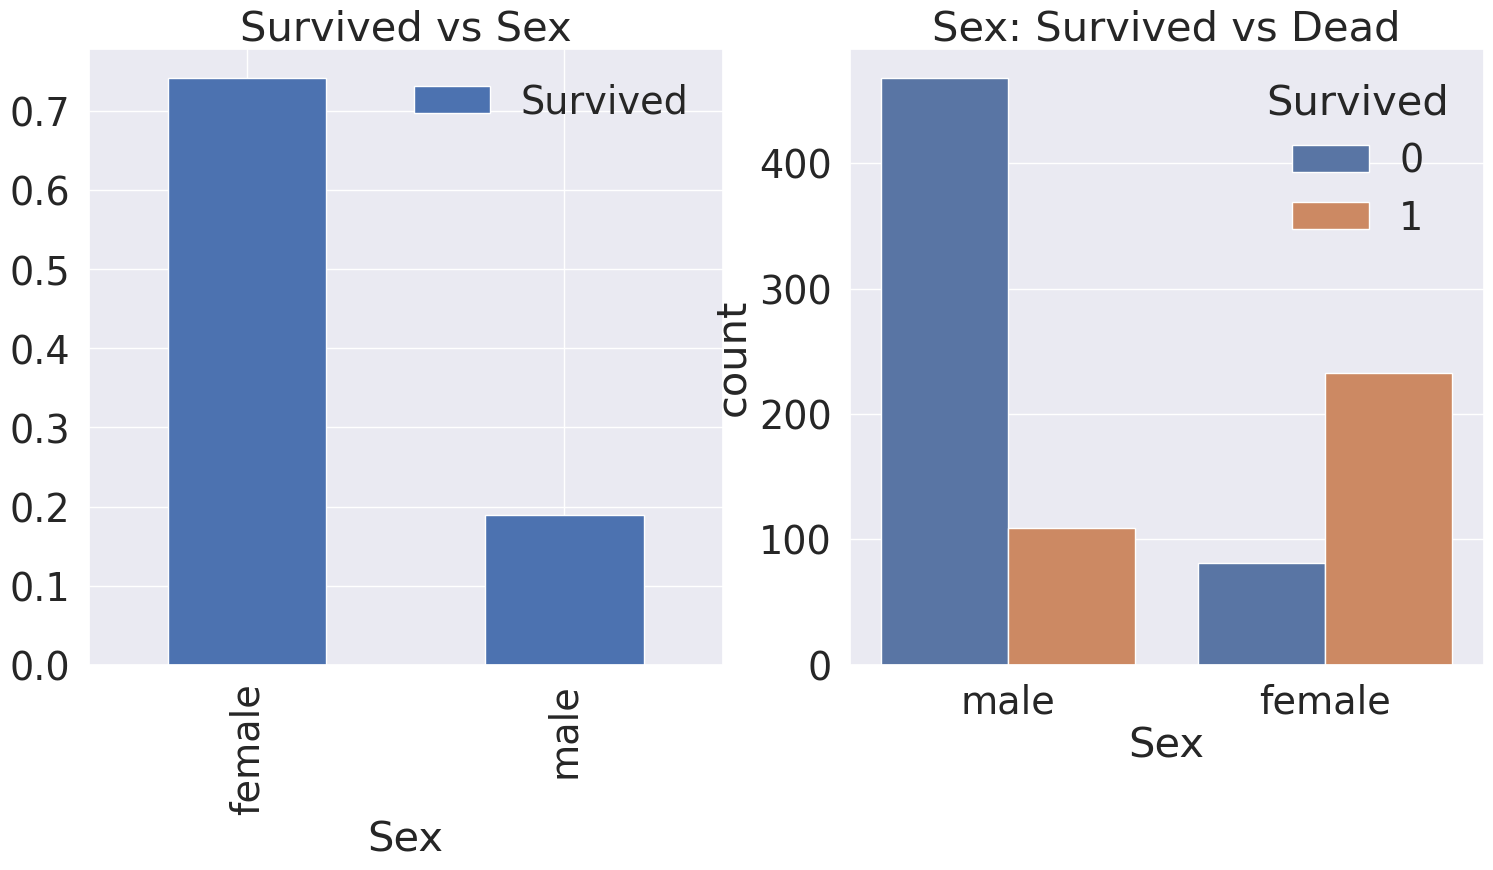

In [118]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [119]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [120]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='RdPu')
#margin: All을 나타냄
#style.background_gradient: 배경 색깔
#color map scheme: cmap의 색깔 코드

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<h4>2-3</h4>

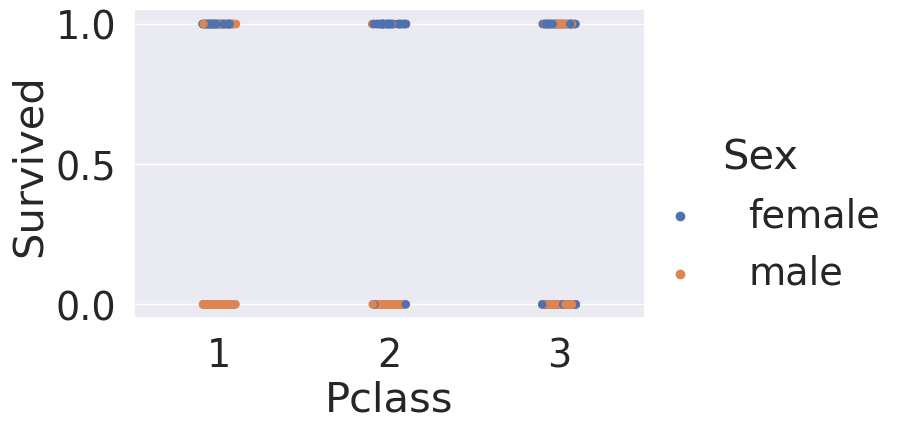

In [121]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

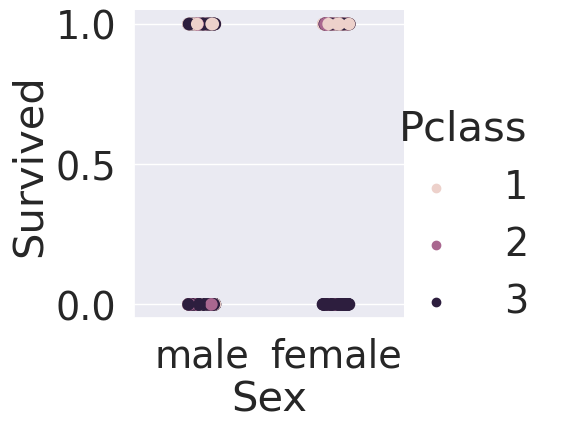

In [122]:
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=df_train,size=9,aspect=1) #satureation=.5,

<h4>2-4</h4>

In [123]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


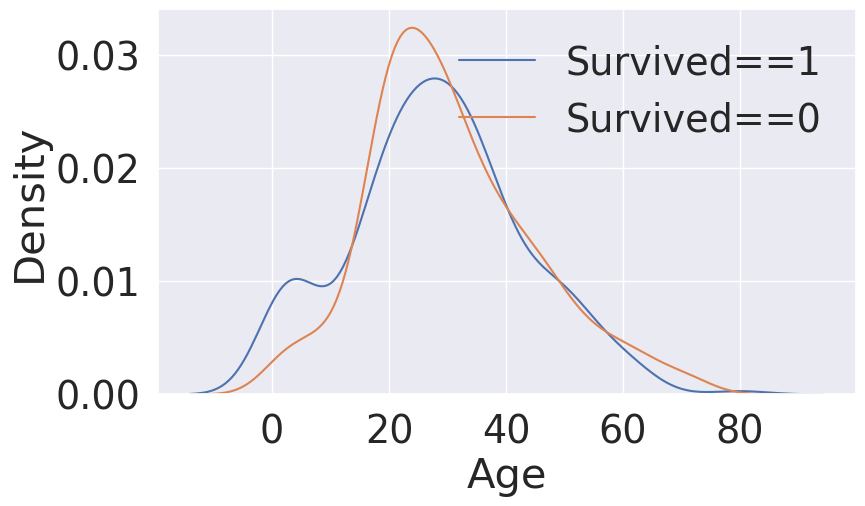

In [124]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

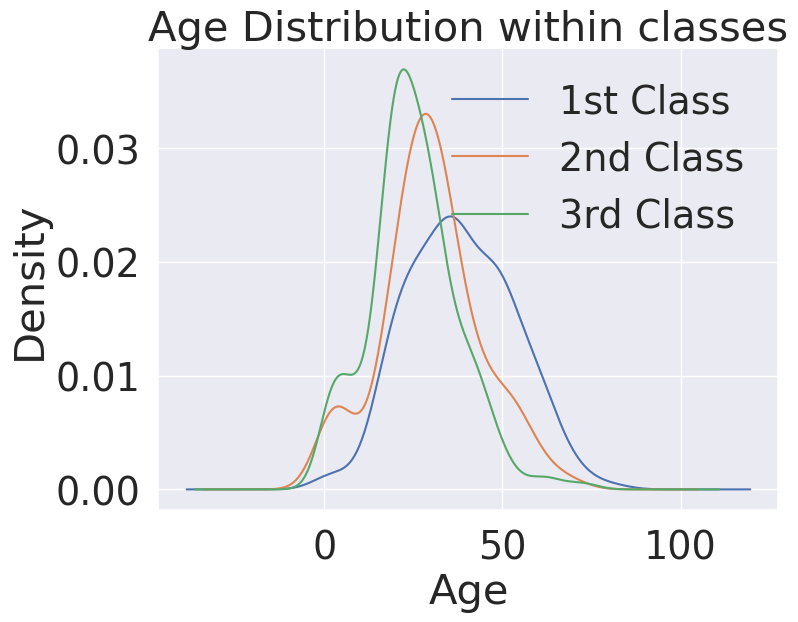

In [125]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

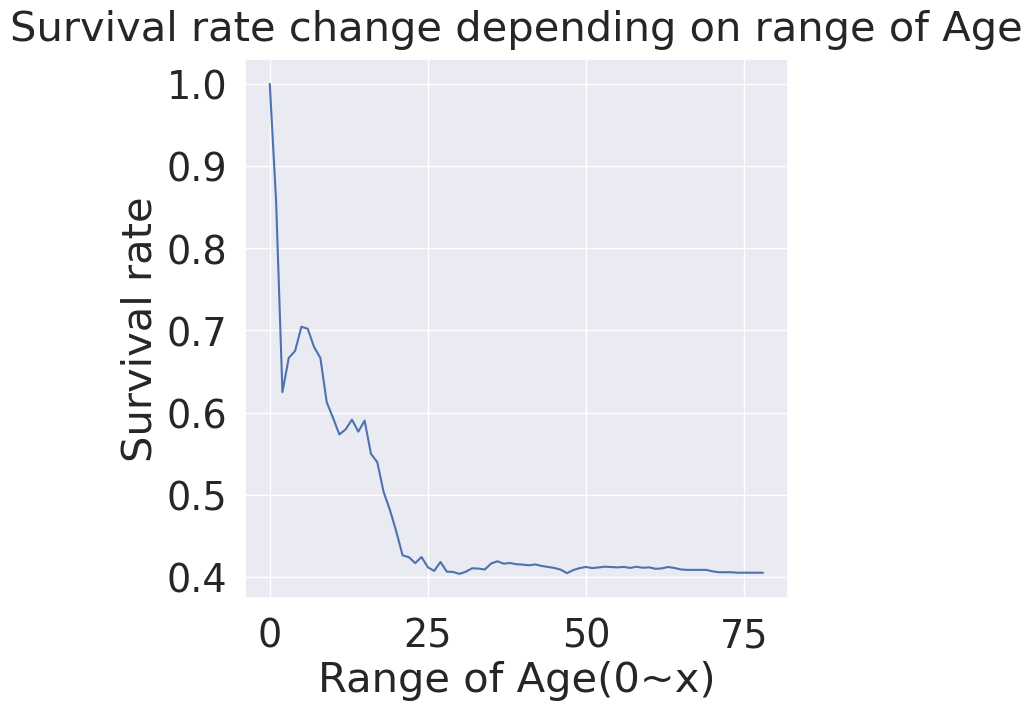

In [126]:
cummulate_survival_ratio=[]
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

<h4>2-5</h4>

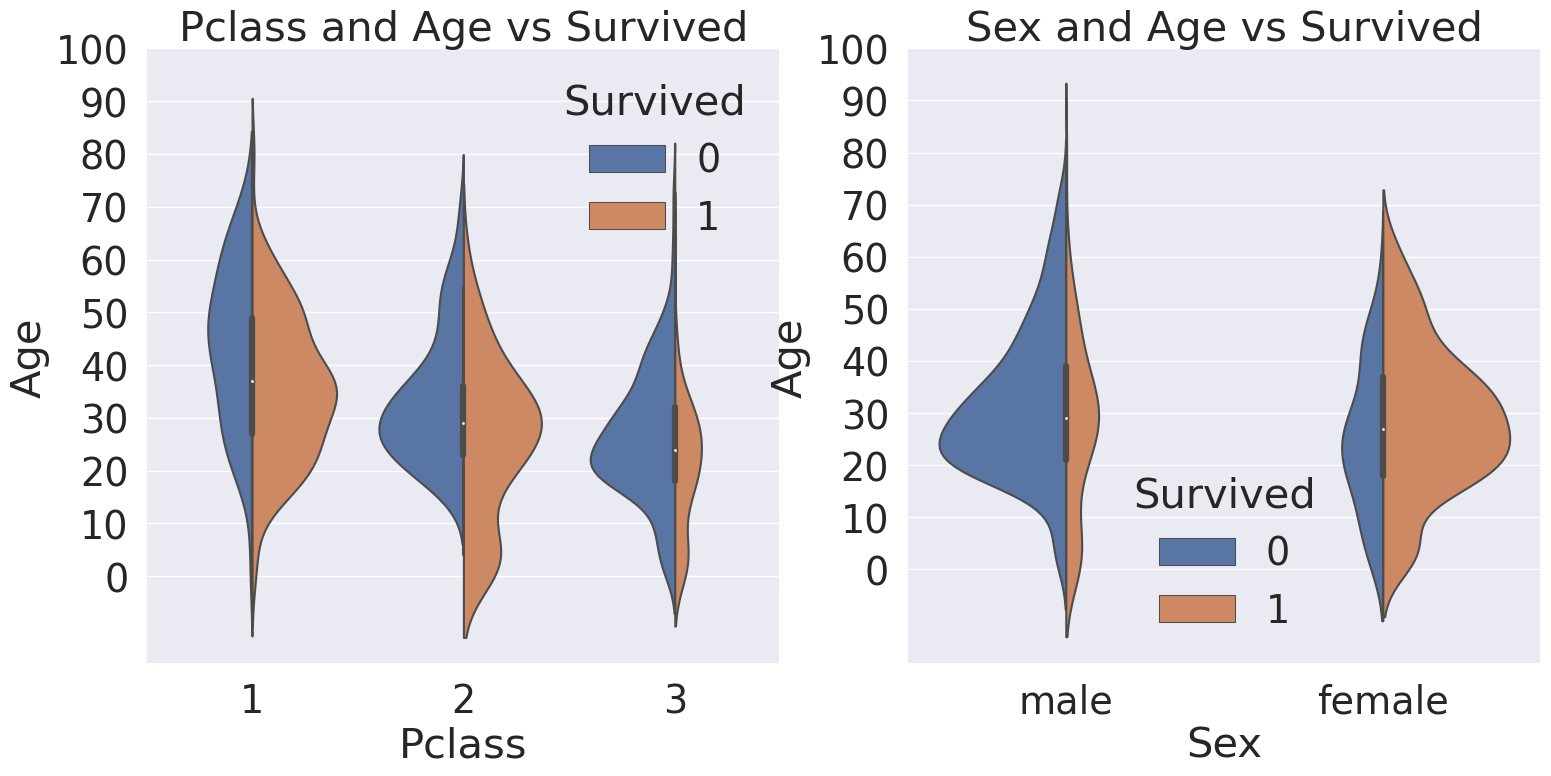

In [127]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<h4>2-6</h4>

<Axes: xlabel='Embarked'>

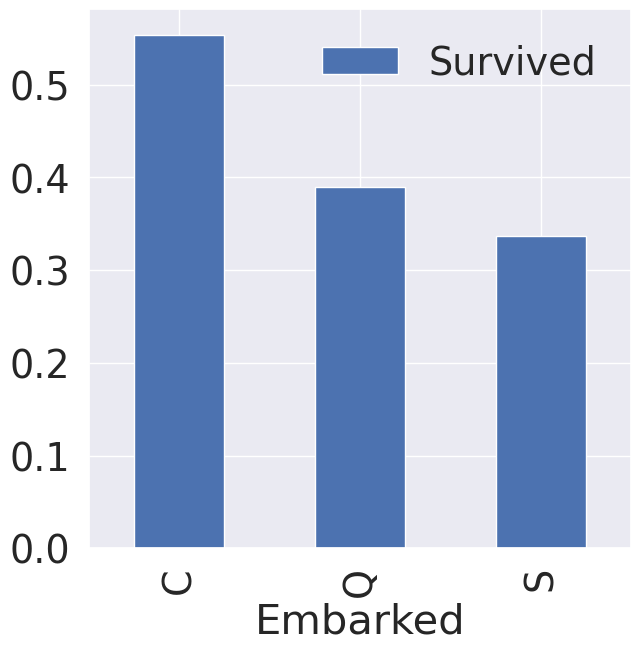

In [128]:
f,ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

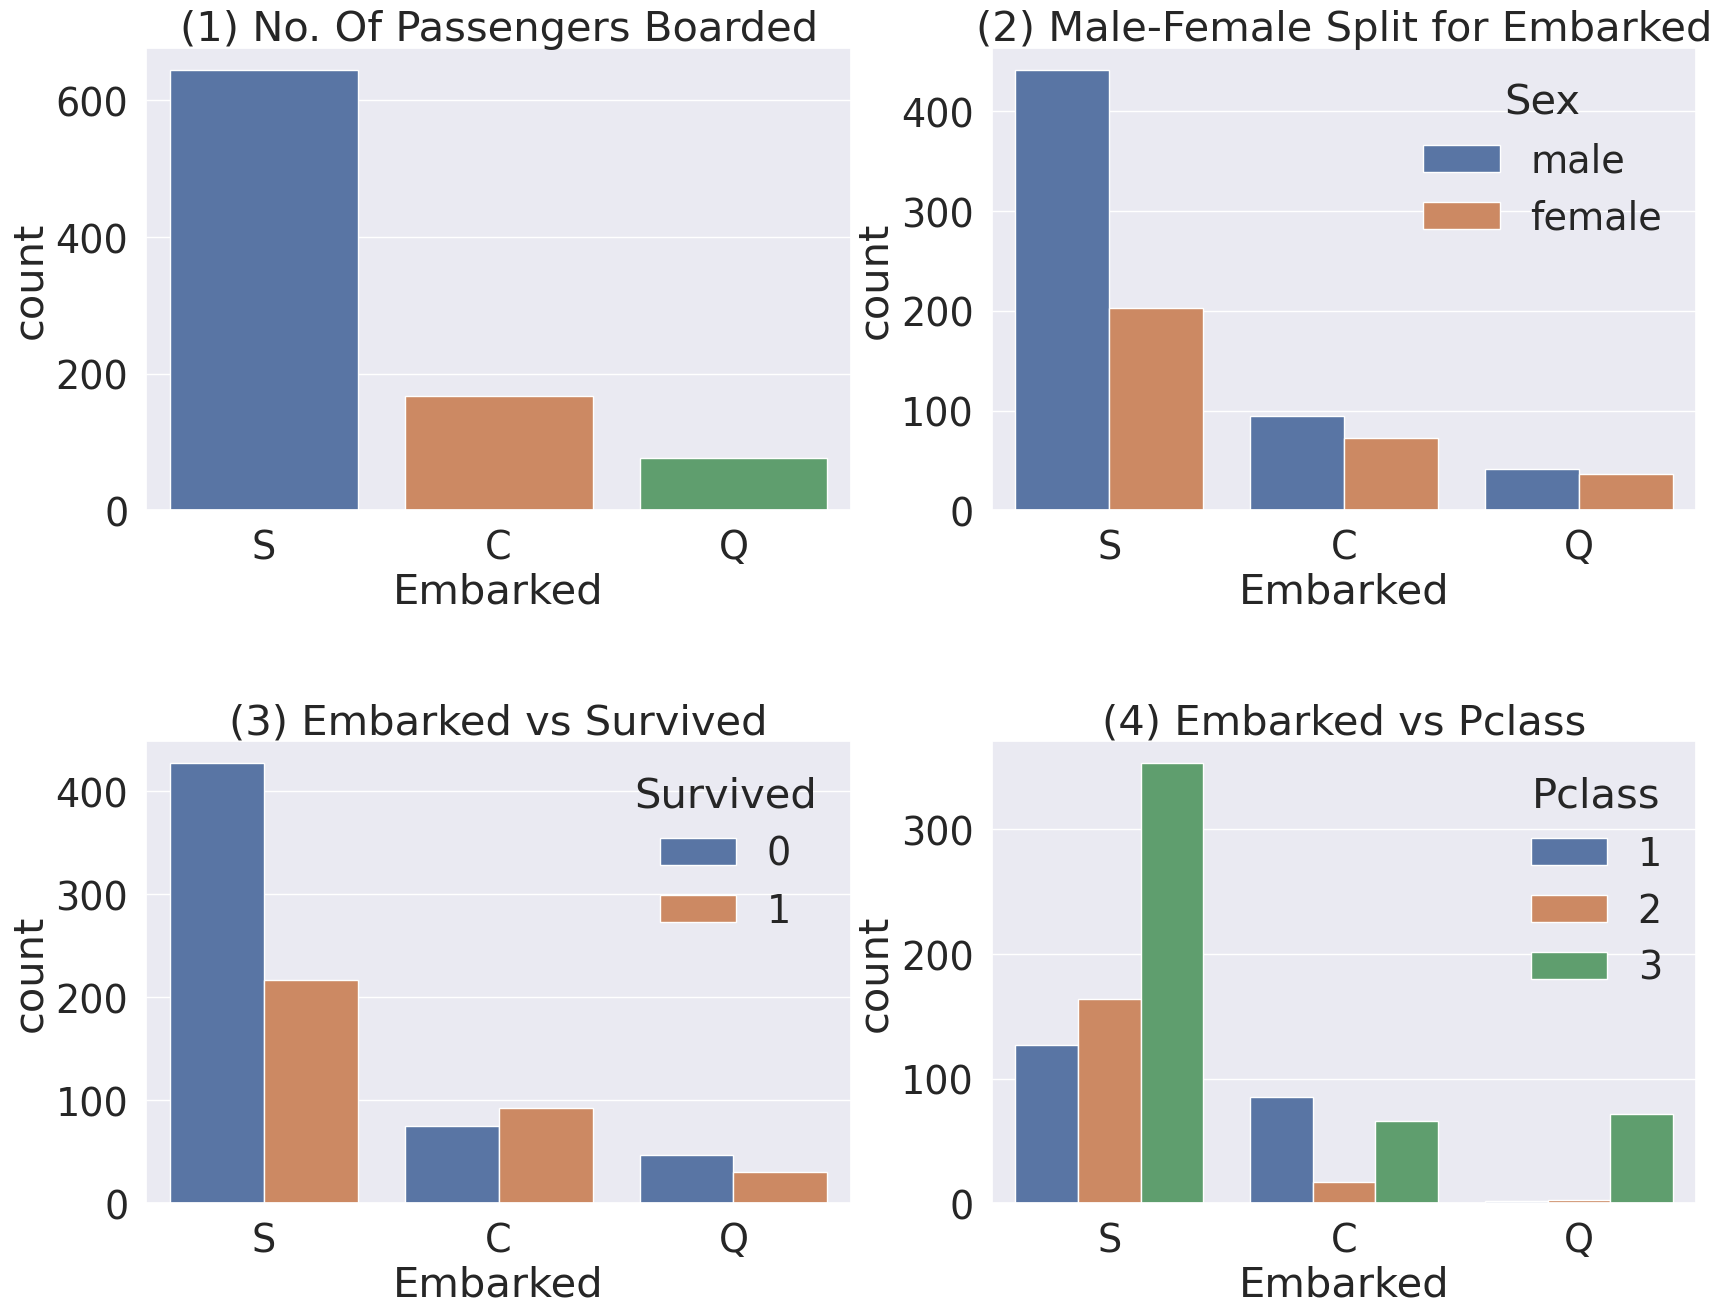

In [129]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

<h4>2-7</h4>

In [130]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1

In [131]:
print("Maximum size of Family: ",df_train['FamilySize'].max())
print("Minimum size of Family: ",df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


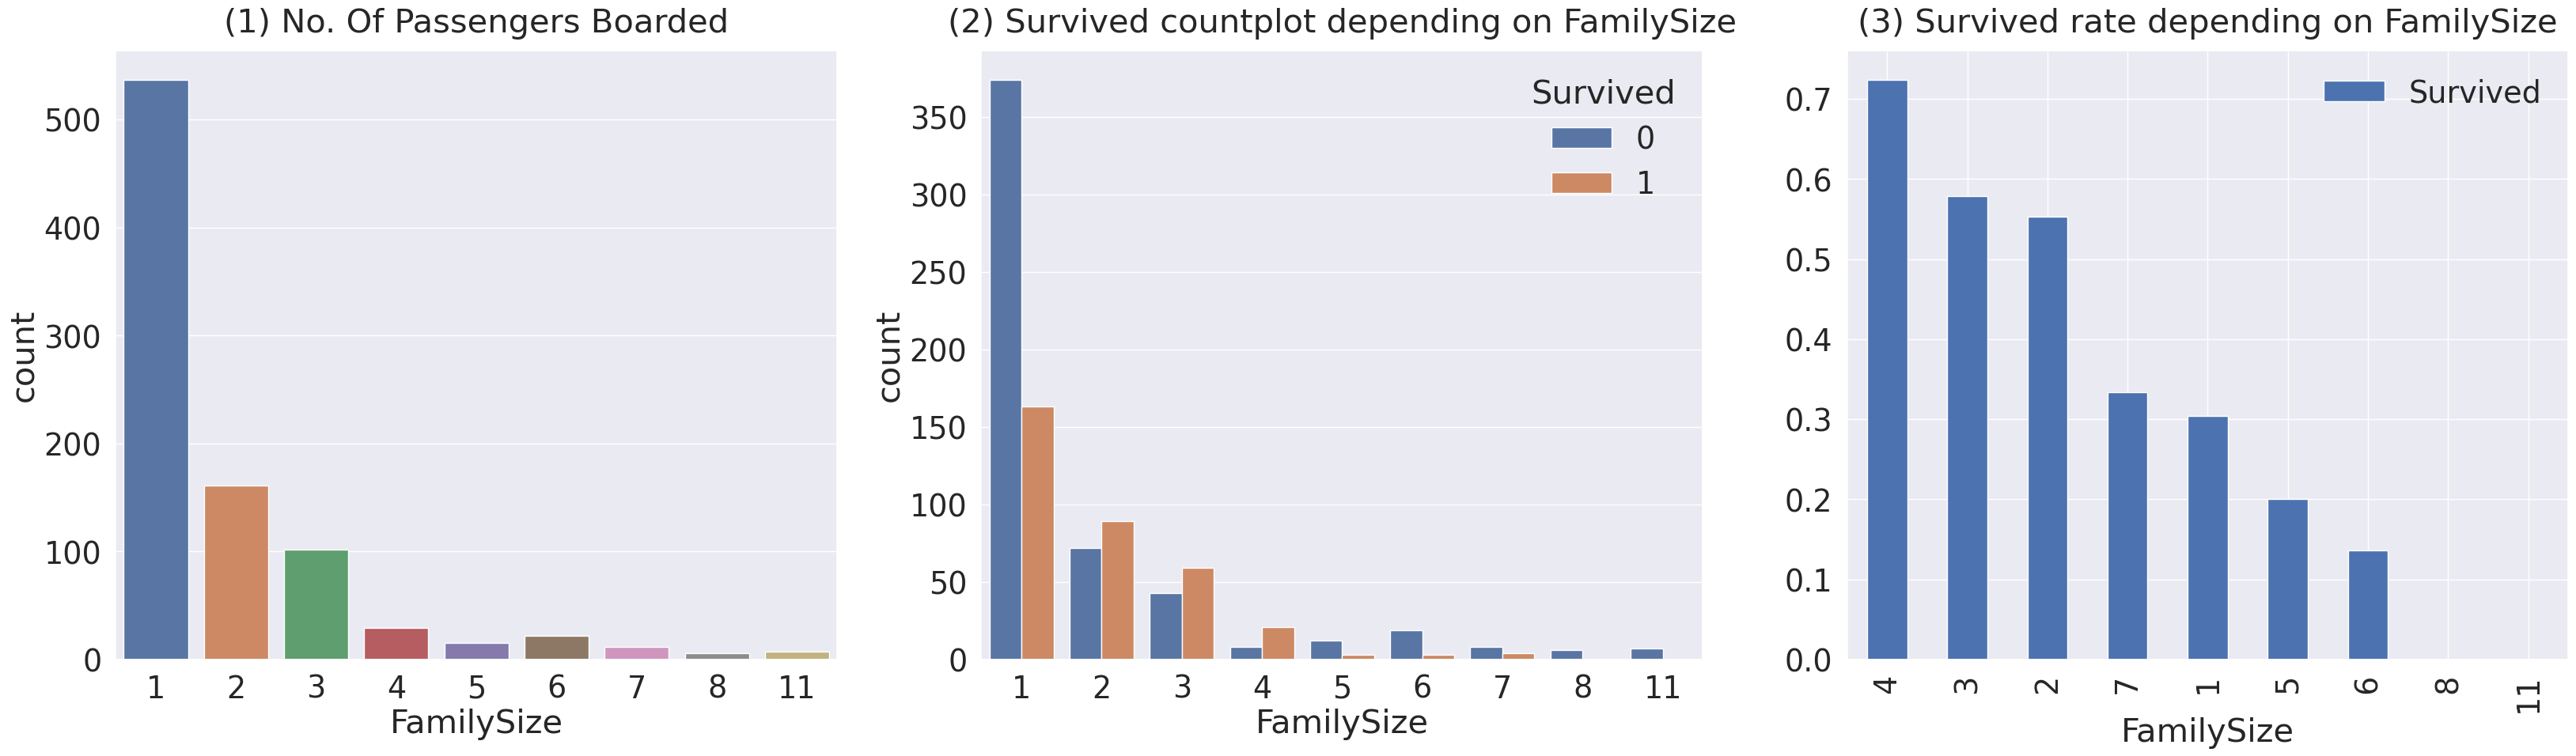

In [132]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<h4>2-8</h4>

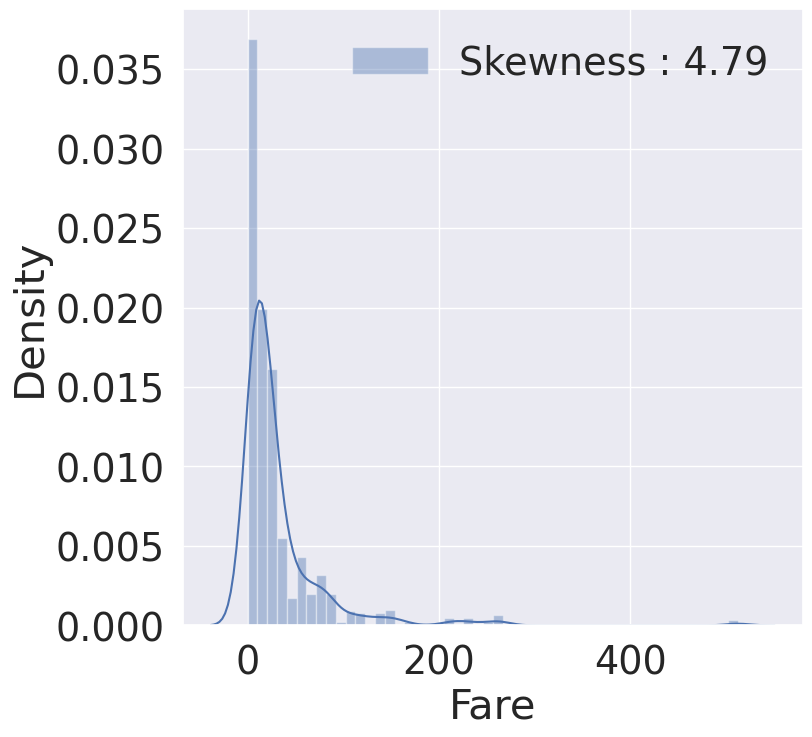

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [134]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

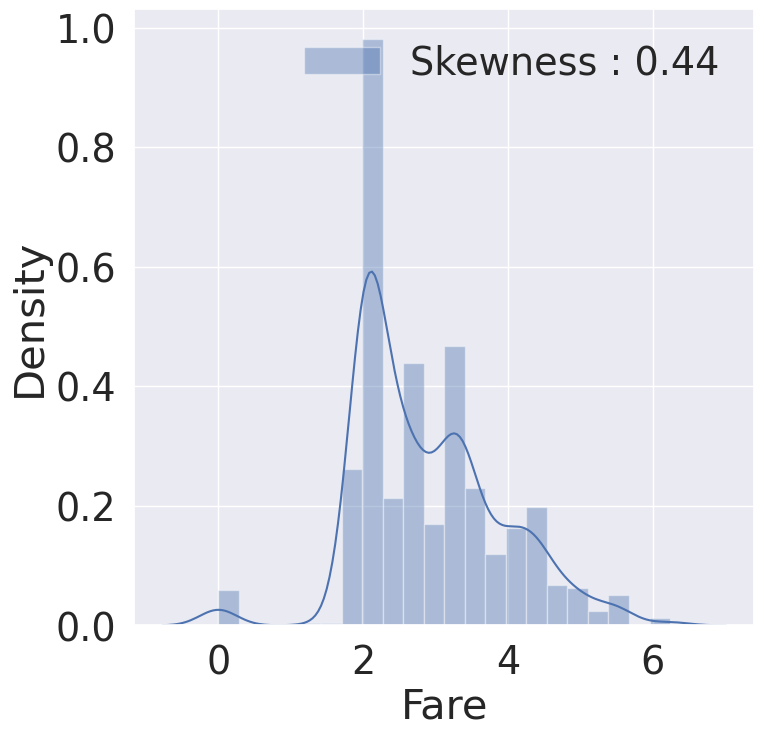

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

<h4>2-9</h4>

In [136]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


<h4>2-10</h4>

In [137]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

<h1>3. Feature engineering</h1>
https://kaggle-kr.tistory.com/18

<h4>3-1</h4>

In [138]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') 
df_test['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') 
#str.extract: 문자열 추출
#('([A-Za-z]+)\.'): 띄어쓰기로 시작해 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가 dot(.)으로 마무리하는 문자열

In [139]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')
#crosstab(교차분석표): 범주형 데이터 2개를 비교분석할 때 유용한 표
#T: 데이터의 열과 행을 바꾸는 방법
#style.background_gradient: 스타일 바꾸기

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [140]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

#replace(): 문자열을 변경하는 함수
#inplace=True: 한번에 기존 변수(기존 데이터프레임)에 덮어 쓰기

In [141]:
df_train.groupby('Initial').mean()
#groupby: 그룹별 통계량 확인
#mean(): 평균 구하기

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

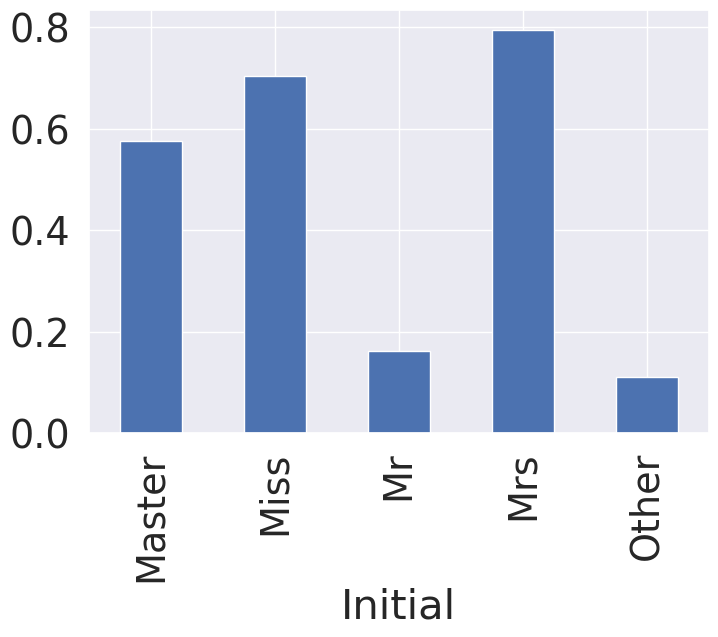

In [142]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [143]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [144]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

#loc: 데이터프레임 인덱싱 하는 방법
    #1. 데이터프레임의 행이나 컬럼에 label이나 boolean array로 접근.
    #2. location의 약어로, 인간이 읽을 수 있는 label 값으로 데이터에 접근하는 것이다. 
#is_null(): 결측치 확인
#이 방법을 통해 NULL을 채울 수 있음

In [145]:
print('Embarked has ',sum(df_train['Embarked'].isnull()),'Null values')
#sum: 합을 구하는 함수

Embarked has  2 Null values


In [146]:
df_train['Embarked'].fillna('S',inplace=True)
#fillna: 결측값 변경 (결측값 채우기)

<h4>3-2</h4>

In [147]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [148]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7
#loc: 데이터프레임 인덱싱 하는 방법
    #1. 데이터프레임의 행이나 컬럼에 label이나 boolean array로 접근.
    #2. location의 약어로, 인간이 읽을 수 있는 label 값으로 데이터에 접근하는 것이다. 

In [149]:
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2']=df_train['Age'].apply(category_age)
#apply: 원하는 값에 원하는 함수 적용

In [150]:
df_train['Age_cat_2']=df_train['Age'].apply(category_age)
#apply: 원하는 값에 원하는 함수 적용

In [151]:
(df_train['Age_cat']==df_train['Age_cat_2']).all()
#all: 인자로 받은 반복 가능한 자료형의 모든 요소가 참이면 참(True)을 반환

True

In [152]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())
#all: 인자로 받은 반복 가능한 자료형의 모든 요소가 참이면 참(True)을 반환

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [179]:
df_train.drop(['Age','Age_cat_2'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)
#inplace: 원본을 변경할지 여부. True일경우 원본이 변경됨

KeyError: "['Age', 'Age_cat_2'] not found in axis"

<h4>3-3</h4>

In [154]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
#map: 리스트의 요소를 지정된 함수로 처리해주는 함수

In [155]:
df_train['Embarked'].unique()
#unique(): 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수 (유일한 값, 고유한 값 찾기)

array(['S', 'C', 'Q'], dtype=object)

In [156]:
df_train['Embarked'].value_counts()
#value_counts: 고유한 행의 갯수를 반환

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [157]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [158]:
df_train['Embarked'].isnull().any()
#any: 인자로 받은 반복 가능한 자료형의 중 단 하나라도 참이면 참(True)을 반환
    #반대로 모든 요소가 거짓인 경우에만 거짓(False)을 반환

False

In [159]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})
#map: 리스트의 요소를 지정된 함수로 처리해주는 함수

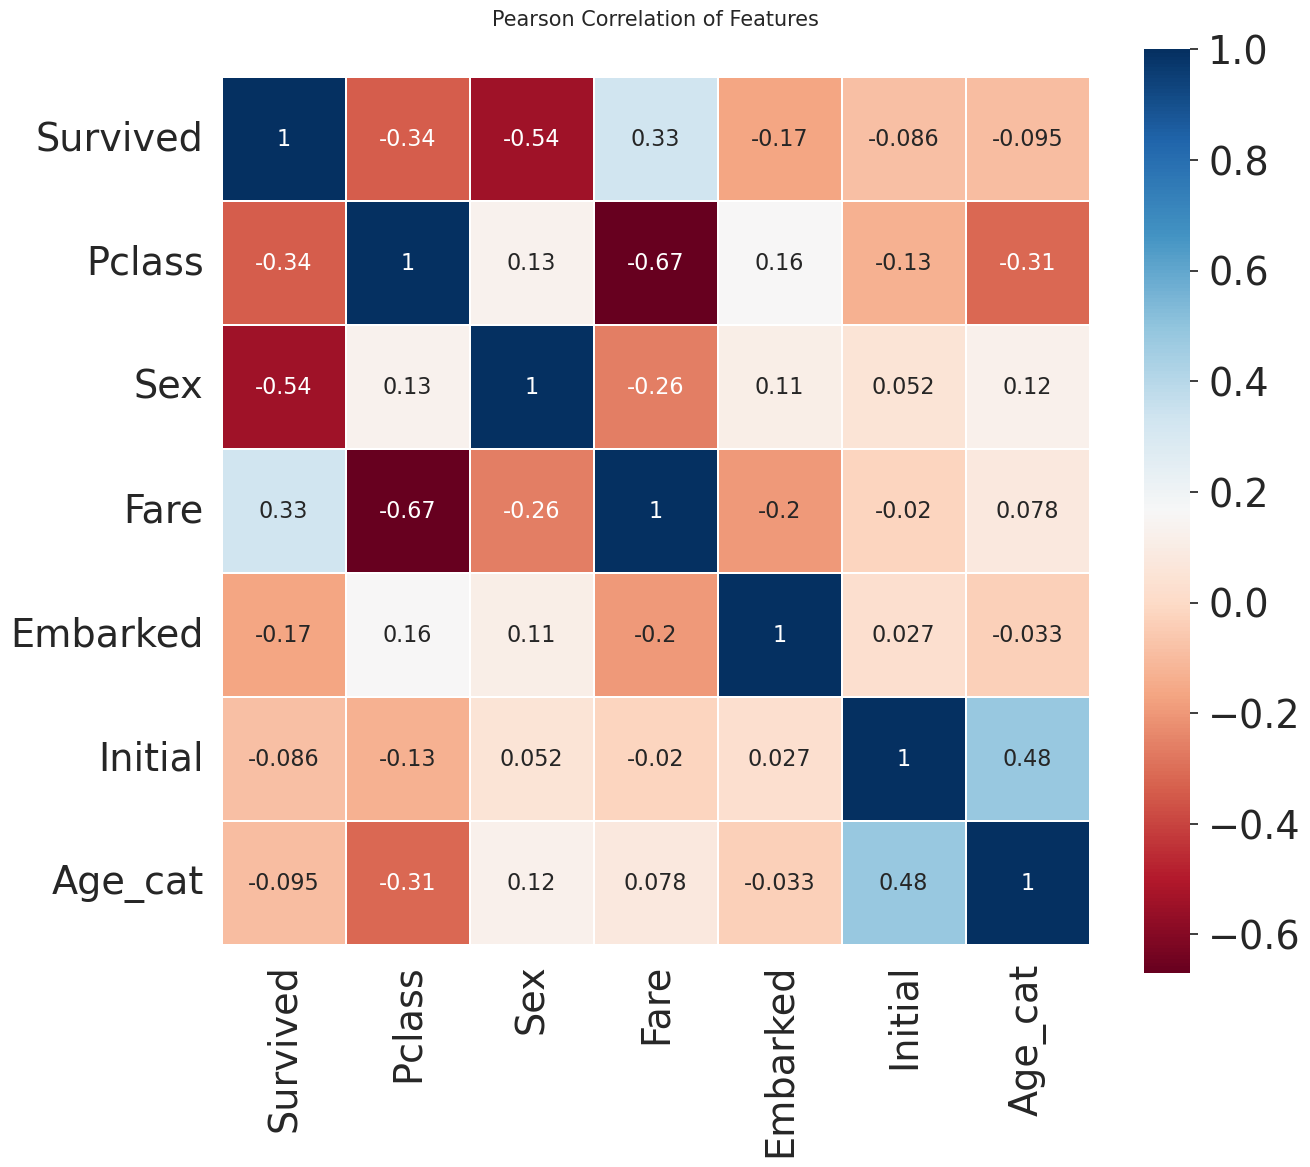

In [160]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Initial', 'Age_cat']] #, 'FamilySize' 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data
#plt.cm: 컬러맵에서 색깔 뽑아내기
#figure: 그래프 그리기
#figsize: 그래프 크기 조절하기
#astype: 데이터프레임 타입 바꾸기(float: 문자열 column을 숫자형으로 바꾸기)
#corr: 상관계수
#linewidths: 선의 두께
#vmax: heatmap 오른쪽에 위치한 컬러바의 최댓값을 지정함(밝기 데이터를 정규화하는데 사용됨)
#sqaure: 셀을 정사각형으로 출력
#cmap: 전에 설정했던 colormap의 색상을 사용하여 heatmap을 출력
#linecolor: 선의 색
#annot: 셀 안에 숫자를 출력
#annot_kws: 그 숫자의 크기를 조정해줄 수 있는 파라미터

#https://hong-yp-ml-records.tistory.com/33

In [161]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


<h4>3-4</h4>

In [162]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')
#get_dummies: 데이터 전처리/가변수 만들기
#prefix: 접두사

In [163]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [164]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')
#get_dummies: 데이터 전처리/가변수 만들기
#prefix: 접두사

<h4>3-5</h4>

In [165]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
#drop: 행/열 삭제

In [166]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [167]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,1,0,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,0,1,0,0,0,1
4,3,0,2.508582,3,2,0,0,1,0,0,0,0,1


<h1>4. Building machine learning model and predicton using the trained model</h1>

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

<h4>4-1</h4>

In [169]:
x_train=df_train.drop('Survived',axis=1).values
target_label=df_train['Survived'].values
x_test=df_test.values
#drop: 행/열 삭제
#values: 딕셔너리 관련 함수. 값을 모두 가져옴

In [170]:
X_tr, X_vld, y_tr, y_vld = train_test_split(x_train, target_label, test_size=0.3, random_state=2018)
#split: 문자열을 나눠서 리스트로 만들 때 사용하는 함수
#random_state: 호출할 때마다 동일한 학습용 데이터 세트를 생성하기 위해 주어지는 난수 값

<h4>4-2</h4>

In [171]:
model=RandomForestClassifier()
model.fit(X_tr,y_tr)
prediction=model.predict(X_vld)
#RandomForestClassifier: 랜덤 포레스트 분류
#fit: 머신러닝이 메이터에 머신러닝 모델을 맞추는 것
#predict: 데이터를 넣어 결과를 예측시킴

#https://inuplace.tistory.com/570

In [172]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 
                    100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


<h4>4-3</h4>

In [173]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

#feature_importances_: 특성 중요도 (변수 중요도)

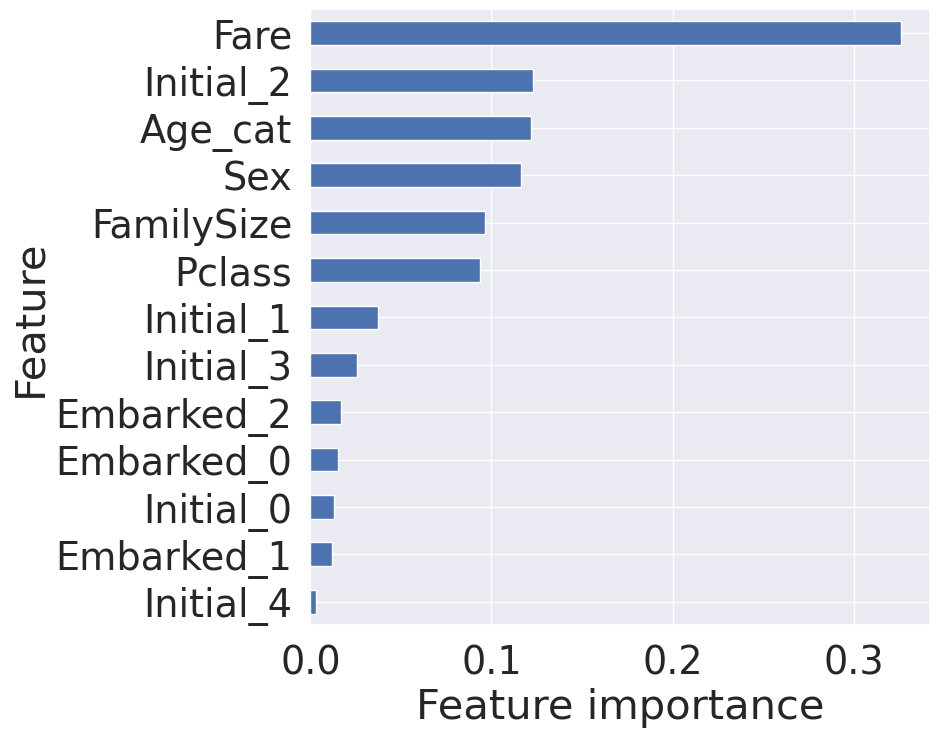

In [174]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()
#sort_values: 값 기준 정렬
    #ascending이 True면 오름차순. False면 내림차순

<h4>4-4</h4>

In [175]:
submission=pd.read_csv('/kaggle/input/titititanic/gender_submission.csv')

In [176]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [177]:
prediction = model.predict(x_test)
submission['Survived'] = prediction

In [178]:
submission.to_csv('./my_first_submission.csv', index=False)